
# Capitolo 1: Il Cuore dei Dati – Media vs Mediana

## 1. Introduzione: La ricerca del "Centro"
In statistica, il nostro primo obiettivo è riassumere una massa caotica di numeri in un unico valore rappresentativo. Questo valore è la **Tendenza Centrale**.

Tuttavia, il "centro" non è un concetto univoco. Esistono due pretendenti al trono: la **Media** e la **Mediana**. Capire quale scegliere — e soprattutto, analizzare la differenza tra i due — è la prima vera competenza di un Data Analyst.

## 2. I Protagonisti

### La Media Aritmetica ($\mu$ o $\bar{x}$)
È il baricentro matematico. Si calcola sommando tutti i valori e dividendo per il numero di osservazioni.
* **La sua forza:** Usa ogni singola informazione disponibile. Se un valore cambia anche di poco, la media cambia.
* **La sua debolezza:** È **influenzabile**. Basta un solo valore estremo (outlier) per spostarla drasticamente, distorcendo la realtà.

### La Mediana
È il valore posizionale. Se ordiniamo tutti i dati dal più piccolo al più grande, la mediana è il numero che sta esattamente nel mezzo (lascia il 50% dei dati a sinistra e il 50% a destra).
* **La sua forza:** È **robusta**. Non le importa quanto siano grandi i valori estremi, le importa solo l'ordine.
* **La sua debolezza:** Ignora la grandezza dei valori sulle code.

---

## 3. La Diagnostica: Cosa succede quando le confrontiamo?

La magia avviene quando smettiamo di guardarle singolarmente e le valutiamo insieme. La relazione tra Media e Mediana ci rivela la **forma** (Skewness) della distribuzione senza nemmeno guardare il grafico.

### Caso A: L'Equilibrio Perfetto (Media $\approx$ Mediana)


Quando i due valori coincidono (o sono molto vicini), i dati sono distribuiti simmetricamente.
* **Significato:** Non ci sono squilibri. I valori alti e bassi si bilanciano perfettamente.
* **Esempio:** L'altezza di un reggimento di soldati. Ci sono alcuni bassi e alcuni alti, ma si compensano. La media è un ottimo rappresentante.

### Caso B: L'Asimmetria Positiva / Coda a Destra (Media > Mediana)

Quando la Media è significativamente **più alta** della Mediana.
* **La Dinamica:** C'è una "coda" di valori altissimi che sta trascinando la media verso l'alto, mentre la mediana rimane ancorata alla maggioranza delle persone.
* **L'Esempio Classico (Reddito):** Immagina di essere in un bar con 10 operai. Il reddito medio è 1.500€. Entra Elon Musk. Improvvisamente, il reddito **medio** del bar diventa 100 milioni di euro. Il reddito **mediano** rimane 1.500€.
    * *La Media mente:* Dice che nel bar sono tutti milionari.
    * *La Mediana dice la verità:* Dice che la "persona tipo" è ancora un operaio.

### Caso C: L'Asimmetria Negativa / Coda a Sinistra (Media < Mediana)

Quando la Media è significativamente **più bassa** della Mediana.
* **La Dinamica:** C'è una "coda" di valori molto bassi che trascina la media giù.
* **Esempio (Longevità):** Se in un paese la maggior parte delle persone muore a 80-90 anni, ma c'è un tasso di mortalità infantile, quei pochi "zeri" o numeri bassi abbasseranno la media (es. speranza di vita 75 anni), anche se la mediana (la morte tipica) avviene a 85 anni.

---

## 4. Guida Pratica all'Interpretazione

Quando leggi un report o un articolo di giornale, usa questa tabella mentale per smascherare i dati:

| Relazione | Diagnosi | Chi "vince"? |
| :--- | :--- | :--- |
| **Media $\approx$ Mediana** | Distribuzione Simmetrica (Campana) | **La Media.** È matematicamente più potente per calcoli successivi. |
| **Media $\gg$ Mediana** | Forti Outliers Alti (es. Prezzi case, Stipendi) | **La Mediana.** La media è "dopata" dai ricchi/valori alti. |
| **Media $\ll$ Mediana** | Forti Outliers Bassi (es. Voti facili con pochi bocciati) | **La Mediana.** La media è eccessivamente pessimista. |

## 5. Sintesi

Valutarle insieme è un atto di investigazione.
* La **Media** ci dice "quanto c'è in totale" (utile per allocare risorse: es. quanto cibo serve per sfamare tutti).
* La **Mediana** ci dice "chi è l'individuo tipico" (utile per capire la realtà dell'esperienza comune).

Se la distanza tra le due è grande, c'è una storia nascosta nei dati (disuguaglianza, errore di misurazione, o un fenomeno particolare) che la sola media stava cercando di nascondere.

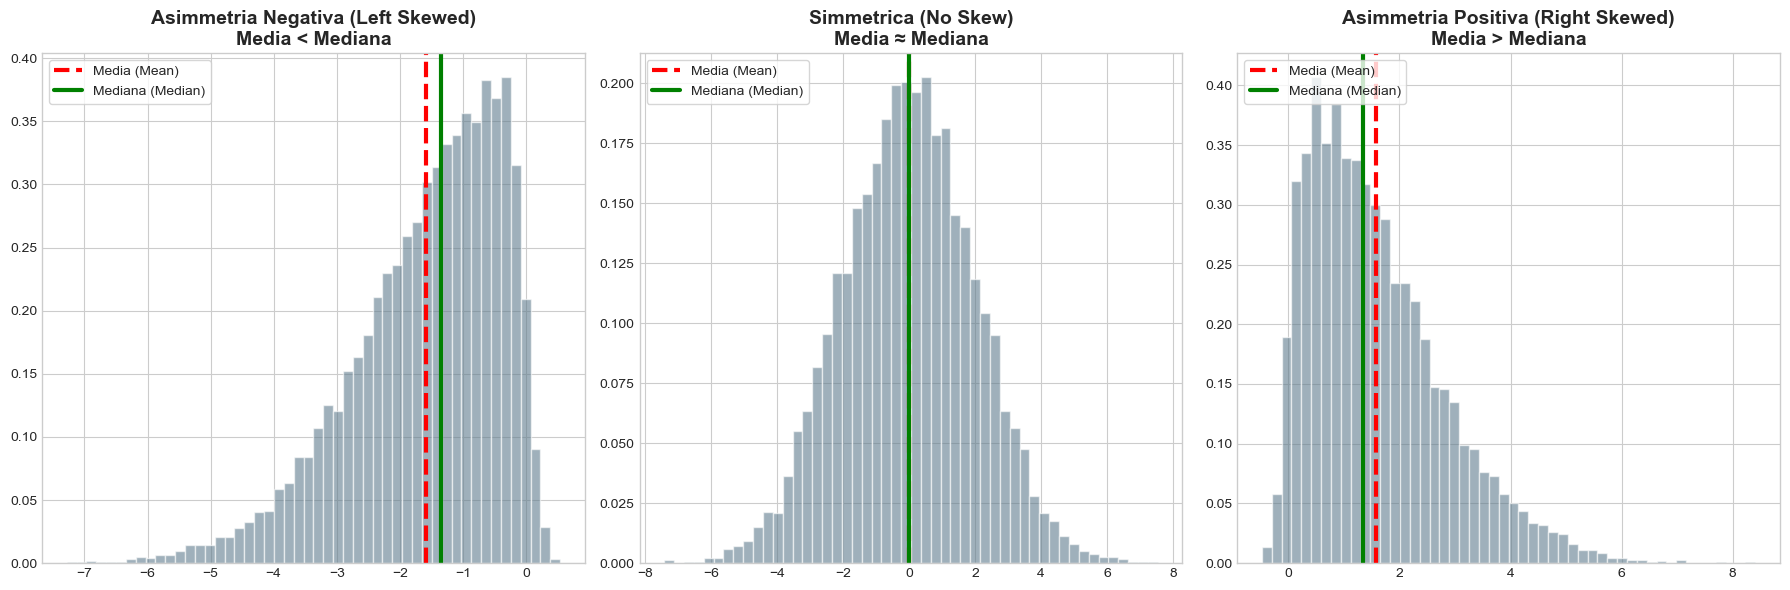

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

# Impostazioni grafiche
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Funzione ausiliaria per creare i grafici
def plot_skewed_dist(a, ax, title):
    # Generiamo dati asimmetrici (a è il parametro di skewness)
    # size alta (10000) per avere curve pulite
    data = skewnorm.rvs(a, size=10000, loc=0, scale=2)
    
    # Calcolo statistiche
    mean_val = np.mean(data)
    median_val = np.median(data)
    
    # Disegno Istogramma
    ax.hist(data, bins=50, density=True, alpha=0.6, color='#607c8e', edgecolor='white')
    
    # Linee Verticali: La parte fondamentale
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=3, label='Media (Mean)')
    ax.axvline(median_val, color='green', linestyle='-', linewidth=3, label='Mediana (Median)')
    
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.legend(loc='upper left', frameon=True)

# 1. Asimmetria Negativa (Coda a Sinistra)
plot_skewed_dist(-10, axes[0], 'Asimmetria Negativa (Left Skewed)\nMedia < Mediana')

# 2. Simmetrica (Normale)
plot_skewed_dist(0, axes[1], 'Simmetrica (No Skew)\nMedia ≈ Mediana')

# 3. Asimmetria Positiva (Coda a Destra)
plot_skewed_dist(10, axes[2], 'Asimmetria Positiva (Right Skewed)\nMedia > Mediana')

plt.tight_layout()
plt.show()

---

# Capitolo 2: La misura dell'incertezza – La Deviazione Standard

> *"La media è quel numero che, se metti la testa nel forno e i piedi nel congelatore, ti dice che stai a una temperatura confortevole."*

## 1. Introduzione: Perché la media non basta
Quando analizziamo un insieme di dati, il nostro primo istinto è calcolare la **media** (o valore atteso, $\mu$). La media ci fornisce il baricentro dei dati, il punto di equilibrio. Tuttavia, la media nasconde un'informazione cruciale: la storia di come i dati sono distribuiti attorno ad essa.

Immaginiamo due classi di studenti che hanno svolto lo stesso esame:
* **Classe A:** Tutti gli studenti hanno preso esattamente 24.
* **Classe B:** Metà classe ha preso 18 e l'altra metà 30.

La media di entrambe le classi è **24**. Eppure, la situazione pedagogica è drasticamente diversa. Nella Classe A c'è uniformità; nella Classe B c'è una profonda disparità. Per descrivere questa differenza, non serve un indice di posizione (media), ma un **indice di dispersione**.

Qui entra in gioco la **Deviazione Standard** (o Scarto Quadratico Medio), indicata con la lettera greca sigma ($\sigma$).

## 2. Definizione Concettuale
La Deviazione Standard è la misura della **distanza media** dei singoli dati dalla loro media.

In termini pratici, risponde alla domanda:
> *"Quanto sbaglio, in media, se scommetto che il prossimo dato sarà uguale alla media?"*

* Una **$\sigma$ bassa** indica che i dati sono raggruppati vicini alla media (alta affidabilità).
* Una **$\sigma$ alta** indica che i dati sono sparpagliati su un ampio intervallo (bassa affidabilità, alto "rumore").

## 3. Anatomia della Deviazione Standard
Per comprendere la formula, non bisogna memorizzarla, ma seguirne la logica passo dopo passo. Il calcolo nasce dalla necessità di misurare le distanze.

$$\sigma = \sqrt{\frac{\sum (x_i - \mu)^2}{N}}$$

Analizziamola dal centro verso l'esterno:

1.  **Lo Scarto $(x_i - \mu)$:** Calcoliamo la distanza di ogni singolo punto dalla media. Alcuni saranno positivi, altri negativi.
2.  **Il Quadrato $(...)^2$:** Se facessimo la media degli scarti semplici, i valori negativi e positivi si annullerebbero (dando zero). Eleviamo al quadrato per rendere tutto positivo e per **penalizzare** maggiormente gli errori grandi (gli *outlier*).
3.  **La Media $(\frac{\sum}{N})$:** Facciamo la media di questi quadrati. Questo valore intermedio si chiama **Varianza** ($\sigma^2$).
4.  **La Radice Quadrata $(\sqrt{...})$:** La varianza è espressa in "unità al quadrato" (es. "metri quadri" o "voti quadri"), che non ha senso intuitivo. Facendo la radice quadrata, riportiamo l'unità di misura a quella originale.

## 4. Interpretazione Grafica: La Regola Empirica


[Image of normal distribution empirical rule 68 95 99.7]


Quando i dati seguono una distribuzione normale (la classica campana di Gauss), la deviazione standard diventa un righello universale. Esiste una regola fondamentale chiamata **Regola 68-95-99.7**:

* **Intervallo $\mu \pm 1\sigma$:** Contiene circa il **68%** dei dati. Se la media è 100 e $\sigma$ è 10, il 68% dei casi cadrà tra 90 e 110. Questo è considerato l'intervallo di "normalità".
* **Intervallo $\mu \pm 2\sigma$:** Contiene circa il **95%** dei dati. Uscire da questo intervallo significa essere un caso "insolito".
* **Intervallo $\mu \pm 3\sigma$:** Contiene il **99.7%** dei dati. Tutto ciò che è fuori da qui è un'anomalia estrema (un *outlier* raro).

## 5. Applicazioni nel Mondo Reale

La deviazione standard cambia nome a seconda del contesto, ma il concetto rimane identico:

### A. Finanza: Il "Rischio"
Nei mercati finanziari, la deviazione standard dei rendimenti di un titolo è chiamata **Volatilità**.
* Titolo A (Media +5%, $\sigma$ = 2%): Guadagno stabile, basso rischio.
* Titolo B (Media +5%, $\sigma$ = 20%): Guadagno medio uguale, ma in un anno potresti fare +25% o -15%. Alto rischio.

### B. Manifattura: Il "Controllo Qualità"
Se produci viti da 5mm, la media deve essere 5.00mm. Ma è la $\sigma$ a determinare la qualità.
* Una $\sigma$ alta significa che molte viti saranno troppo grandi o troppo piccole, inceppando i macchinari dei clienti. L'obiettivo della metodologia *Six Sigma* è ridurre la $\sigma$ a livelli infinitesimali.

### C. Sport: La "Costanza"
Un giocatore di basket che segna 20 punti in ogni singola partita ha una $\sigma = 0$. Un giocatore che segna 40 punti una sera e 0 la sera dopo ha media 20, ma una $\sigma$ altissima. Un allenatore preferisce spesso il giocatore con $\sigma$ bassa per pianificare la strategia.

## 6. Sintesi
La Deviazione Standard è l'aggettivo del dato numerico.
Se la media è il "sostantivo" (chi è il dato), la deviazione standard è l'aggettivo che lo qualifica (è un dato preciso? è un dato caotico?). Senza di essa, ogni media è un'informazione incompleta e potenzialmente fuorviante.

---

<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:41: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:41: SyntaxWarning: invalid escape sequence '\s'
C:\Users\mbagn\AppData\Local\Temp\ipykernel_31672\3474928913.py:18: SyntaxWarning: invalid escape sequence '\s'
  ax1.plot(x, y, label=f'$\sigma$ = {sigma}', lw=3, color=color)
C:\Users\mbagn\AppData\Local\Temp\ipykernel_31672\3474928913.py:41: SyntaxWarning: invalid escape sequence '\s'
  ax2.set_yticklabels([f'$\sigma$={s}' for s in sigmas])


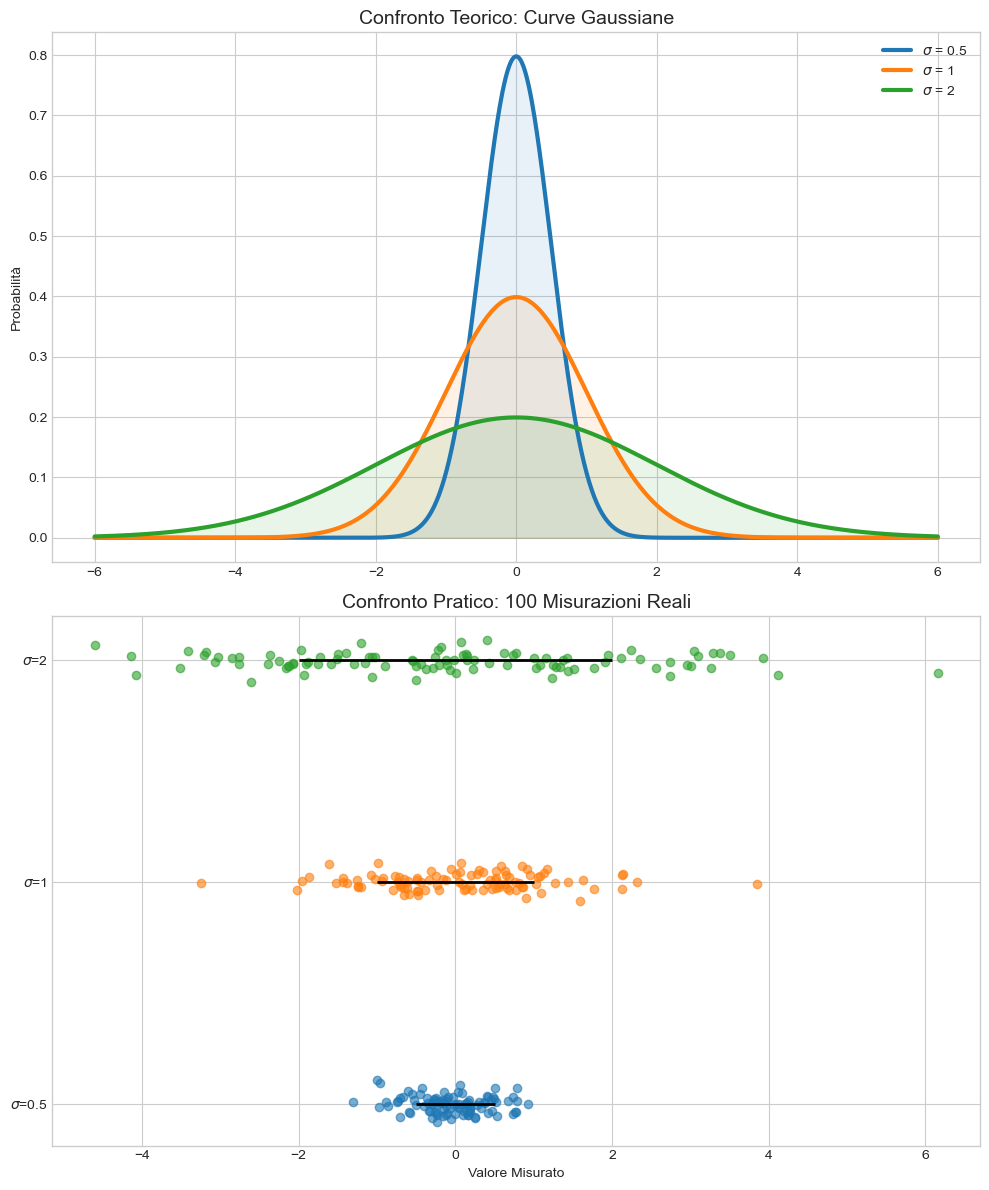

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Impostazioni grafiche
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Parametri: Media fissa, tre deviazioni standard diverse
mu = 0 
sigmas = [0.5, 1, 2] 
colors = ['#1f77b4', '#ff7f0e', '#2ca02c'] # Blu, Arancione, Verde
x = np.linspace(-6, 6, 1000)

# --- GRAFICO 1: LA TEORIA (Curve di Densità) ---
for sigma, color in zip(sigmas, colors):
    y = norm.pdf(x, mu, sigma)
    ax1.plot(x, y, label=f'$\sigma$ = {sigma}', lw=3, color=color)
    ax1.fill_between(x, y, alpha=0.1, color=color)

ax1.set_title('Confronto Teorico: Curve Gaussiane', fontsize=14)
ax1.set_ylabel('Probabilità')
ax1.legend()

# --- GRAFICO 2: LA PRATICA (Simulazione Dati) ---
np.random.seed(42)
n_samples = 100

for i, (sigma, color) in enumerate(zip(sigmas, colors)):
    # Generiamo 100 dati casuali per ogni sigma
    data = np.random.normal(mu, sigma, n_samples)
    # Scatter plot con un po' di jitter verticale per leggibilità
    y_pos = np.random.normal(i, 0.04, n_samples) 
    ax2.scatter(data, y_pos, alpha=0.6, color=color)
    
    # Linea nera che indica l'ampiezza di 1 sigma
    ax2.hlines(i, -sigma, sigma, colors='black', lw=2)

ax2.set_title('Confronto Pratico: 100 Misurazioni Reali', fontsize=14)
ax2.set_yticks([0, 1, 2])
ax2.set_yticklabels([f'$\sigma$={s}' for s in sigmas])
ax2.set_xlabel('Valore Misurato')

plt.tight_layout()
plt.show()

